# 04_RobustScaler

## 載入套件

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

## 載入資料

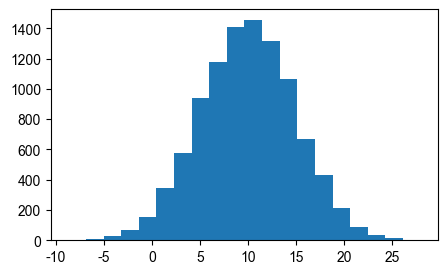

In [2]:
# 常態分配
data = np.random.normal(10, 5, 10000)
plt.figure(figsize=(5,3));
plt.hist(data, 20)
plt.show()

## 轉換

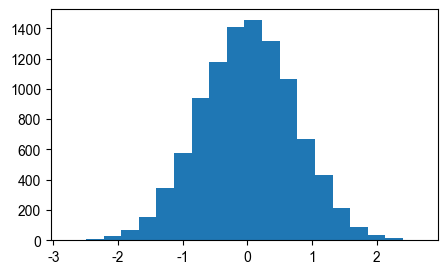

In [3]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_new =scaler.fit_transform(data.reshape(-1, 1))
plt.figure(figsize=(5,3));
plt.hist(data_new, 20)
plt.show()

## 均勻分配轉換

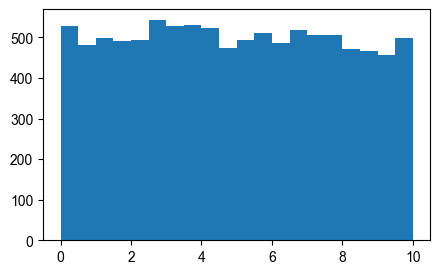

In [4]:
# 均勻分配
data = np.random.uniform(0, 10, 10000)
plt.figure(figsize=(5,3));
plt.hist(data, 20)
plt.show()

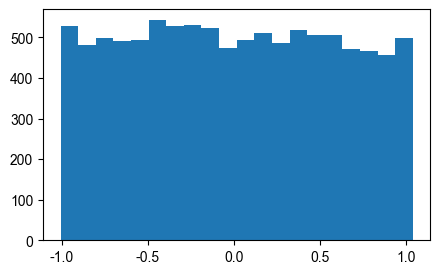

In [5]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_new =scaler.fit_transform(data.reshape(-1, 1))
plt.figure(figsize=(5,3));
plt.hist(data_new, 20)
plt.show()

## 離群值測試

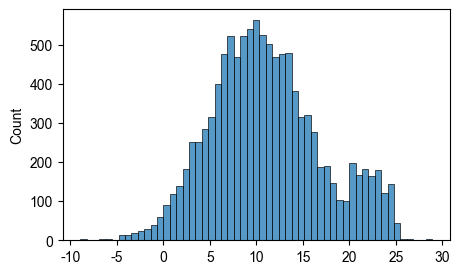

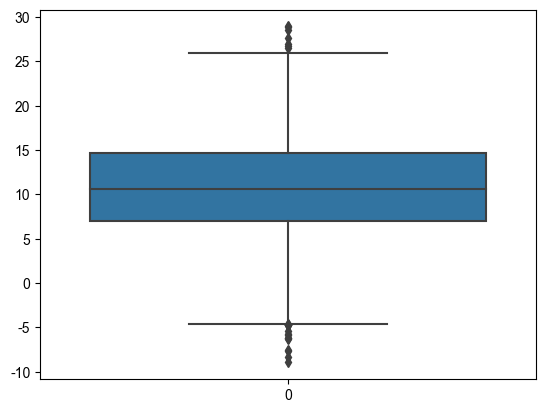

In [36]:
# 加雜訊
data = np.random.normal(10, 5, 10000)
# 加 IQR 外的10筆資料
noise = np.random.uniform(10+5*2, 10+5*3, 1000)
data = np.hstack((data, noise))
plt.figure(figsize=(5,3))
sns.histplot(data=data)
plt.show()

sns.boxplot(data=data)
plt.show()

In [34]:
data.shape

(11000,)

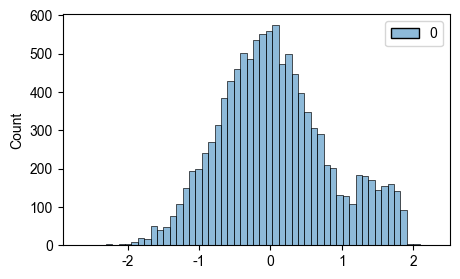

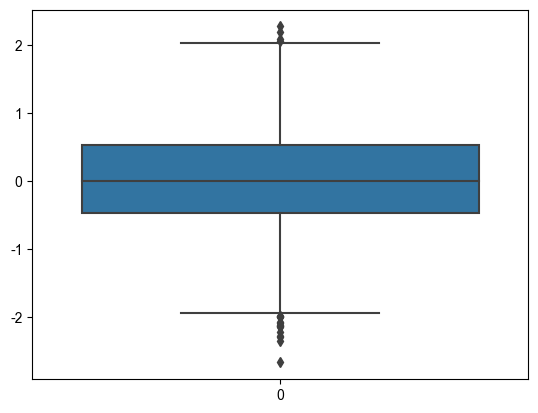

In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_new2 =scaler.fit_transform(data.reshape(-1, 1))
plt.figure(figsize=(5,3))
sns.histplot(data=data_new2)
plt.show()

sns.boxplot(data=data_new2)
plt.show()

## 簡單測試

In [19]:
np.mean(data_new), np.mean(data_new2)

(0.07852844276402514, 0.06394151116772334)

## 資料還原

In [20]:
scaler.inverse_transform(data_new)

array([[16.4864479 ],
       [ 1.65073364],
       [13.42683072],
       ...,
       [21.43842578],
       [21.11864613],
       [24.74434252]])

## 設定參數 with_centering=False，不改變轉換後的平均數

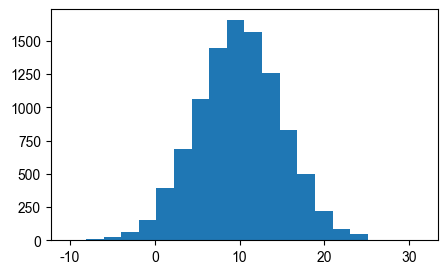

In [23]:
# 常態分配
data = np.random.normal(10, 5, 10000)
plt.figure(figsize=(5,3))
plt.hist(data, 20)
plt.show()

## 轉換

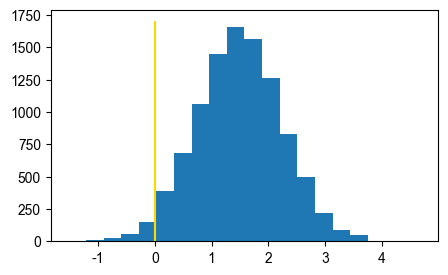

In [32]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_centering=False)
data_new =scaler.fit_transform(data.reshape(-1, 1))
plt.figure(figsize=(5,3))
plt.hist(data_new, 20)
plt.vlines(x=0, ymin=0, ymax=1700, color='gold')
plt.show()

## 設定參數 with_scaling=False，不改變轉換後的標準差

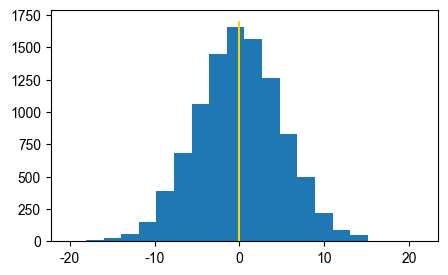

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_scaling=False)
data_new =scaler.fit_transform(data.reshape(-1, 1))
plt.figure(figsize=(5,3))
plt.hist(data_new, 20)
plt.vlines(x=0, ymin=0, ymax=1700, color='gold')
plt.show()